In [12]:
# no imports start from scratch
colors = ('red','blu','grn')
numbers = ('one','two','thr')
shapes = ('circle','square','squigg')
shades = ('full','line','blnk')

In [13]:
my_deck = list()
for col in colors:
    for num in numbers:
        for shp in shapes:
            for shd in shades:
                my_deck.append((col,num,shp,shd))
            

In [25]:
from random import shuffle
new_deck = shuffle(my_deck)

In [45]:
foo  =[x for x in range(3)]
bar = shuffle(foo)

In [58]:
def get_deck(n_deck=1):
    # constants
    colors = ('red','blu','grn')
    numbers = ('one','two','thr')
    shapes = ('circle','square','squigg')
    shades = ('full','line','blnk')
    my_deck = list()
    for col in colors:
        for num in numbers:
            for shp in shapes:
                for shd in shades:
                    my_deck.append((col,num,shp,shd))
    deck_out = [sample(my_deck,len(my_deck)) for i in range(n_deck)]
    return deck_out

In [247]:
def deal_deck(deck,cards_needed = 12):
    n_missing = cards_needed- len(deck)
    if (n_missing<0): n_missing=0
    cards_needed -= n_missing
    #print(cards_needed)
    return deck[:cards_needed]

In [246]:
d1 = get_deck()
hand = deal_deck(d1[0])
hand

12


[('blu', 'two', 'circle', 'line'),
 ('blu', 'thr', 'square', 'blnk'),
 ('red', 'two', 'squigg', 'blnk'),
 ('grn', 'one', 'circle', 'line'),
 ('blu', 'thr', 'circle', 'line'),
 ('grn', 'thr', 'circle', 'full'),
 ('grn', 'two', 'circle', 'blnk'),
 ('grn', 'two', 'squigg', 'line'),
 ('red', 'thr', 'squigg', 'line'),
 ('grn', 'one', 'circle', 'full'),
 ('blu', 'one', 'circle', 'line'),
 ('grn', 'thr', 'squigg', 'line')]

In [115]:
def subset(items): 
    # checks if 3 items (i.e colors of three cards) constitute a set
    assert len(items)==3
    if (items[0]==items[1]==items[2]) or (items[0]!=items[1]!=items[2]!=items[0]): return True
    else: return False
def SET(cards):
    # checks if 3 cards constitute a set
    assert len(cards)==3 # must be 3 cards
    assert len(cards[0])==4 # normal set cards
    for quality in range(len(cards[0])):
        items = [x[quality] for x in cards]
        is_good = subset(items)
        if not is_good: return False # if Fail for any quality
    return True

In [100]:
tmp1 = 'cat'
tmp2 = 'dog'
tmp3 = 'dog'
tmp3==tmp3==tmp3
tmp2!=tmp1!=tmp1

False

In [329]:
def search_hand_brute(hand):
    # this method just looks at every hand in the deck starting with 1,2,3
    # dumb implies it will repeat hands by iterating but this should actually be easy
    # to eliminate by keeping a list of hands exausted in the first position
    #
    # 12 choose 3 = 220
    # 15 choose 3 = 455
    # 18 choose 3 = 816
    n_cards = len(hand)
    good_c1 = [i for i in range(n_cards-2)]
    good_c2 = [i for i in range(1,n_cards-1)]
    good_c3 = [i for i in range(2,n_cards)]
    cnt = 0
    for c1 in good_c1:
        if any(x==c1 for x in good_c2):
            good_c2.remove(c1)
        if any(x==c1 for x in good_c3):
            good_c3.remove(c1)
        for c2 in good_c2:
            good_c3_use = [x for x in good_c3 if x>c2]
            for c3 in good_c3_use:
                c_use = [c1,c2,c3]
                cards = [hand[i] for i in c_use]
                cnt +=1
                is_set = SET(cards)
                if is_set:
                    return True, cards, c_use, cnt
    return False, [],[],cnt

In [342]:
def play_game(deck=get_deck(),search_fcn = search_hand_brute):
    if len(deck)!=1: # semi-recursive iteration
        all_sets = list()
        all_cnts = list()
        hands = list()
        for i in range(len(deck)):
            all_set,all_cnt,hand = play_game([deck[i]])
            all_sets.append(all_set)
            all_cnts.append(all_cnt)
            hands.append(hand)
        return all_sets,all_cnts,hands
    
    # function start
    n_cards = 15
    add_c = 3
    #max_n_cards = 18 # not necessary
    deck = deck[0]
    hand = deal_deck(deck,n_cards)
    are_sets = True
    all_sets = list()
    all_cnts = list()
    lap = 0

    while len(hand)>=3 and are_sets:
        are_sets,this_set,this_ind,cnts = search_fcn(hand)
        if not are_sets: 
            hand = deal_deck(deck,n_cards+add_c)
            are_sets,this_set,this_ind,cnts = search_fcn(hand)
            if not are_sets: 
                hand = deal_deck(deck,n_cards+add_c+add_c)
                are_sets,this_set,this_ind,cnts = search_fcn(hand)
                if not are_sets: break
        all_sets.append(this_set)
        all_cnts.append(cnts)
        # for now always refresh hand after capturing
        deck.remove(this_set[0])
        deck.remove(this_set[1])
        deck.remove(this_set[2])
        hand = deal_deck(deck)
        lap +=1
        #print('Set #',lap ,'found')
    return all_sets,all_cnts,hand
          

In [214]:
foo = list()
foo.append(['a','b'])
foo.append(['a','c'])

In [343]:
dx = get_deck(5000)
all_sets,all_cnts,bad_hand = play_game(dx)


In [273]:
search_hand_brute_dumb(bad_hand)

(False, [], [], 220)

In [317]:
import numpy as np
from matplotlib import pyplot as plt

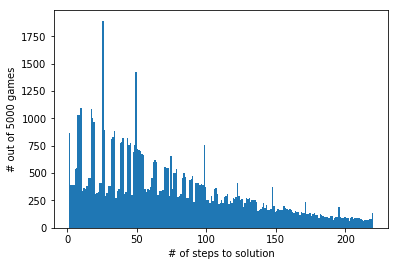

In [328]:
cnt_cat = np.concatenate(all_cnts)
plt.hist(cnt_cat,210)
plt.xlabel('# of steps to solution')
plt.ylabel('# out of 5000 games')
plt.show()

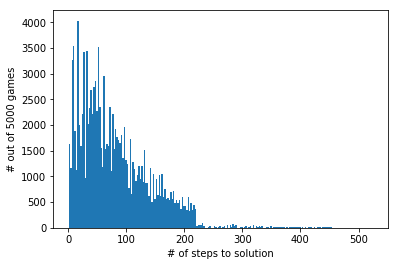

In [341]:
cnt_cat2 = np.concatenate(all_cnts)
plt.hist(cnt_cat2,210)
plt.xlabel('# of steps to solution')
plt.ylabel('# out of 5000 games')
plt.show()